<a href="https://colab.research.google.com/github/sophia62/AI-Banking-Project/blob/main/Dallin_Wolfer_CSE_450_Mod_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [ ]:
target = campaign['y']

cols = []
for col in campaign.columns:
  if col != 'y':
    cols.append(col)

features = campaign[cols]

features.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
!pip install lets_plot
from lets_plot import *
LetsPlot.setup_html()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
def show_numeric_columns():
  numeric_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

  for col in numeric_cols:
    (
        ggplot(
            campaign,
            aes(
              x=col,
              fill='y',
            )
        )
        + geom_histogram(position='stack')
        + labs(title=col)
    ).show()

# show_numeric_columns()

In [ ]:
def show_non_numeric_cols():
  for col in campaign.columns:
    if col in numeric_cols:
      continue

    if col == "y":
      continue

    (
        ggplot(
            campaign,
            aes(
              x=col,
              fill='y',
            )
        )
        + geom_bar()
        + labs(title=col)
    ).show()

# show_non_numeric_cols

In [ ]:
order = ['admin.', 'technician', 'blue-collar', 'retired', 'management', 'services', 'student', 'self-employed', 'unemployed', 'entrepreneur', 'housemaid', 'unknown']

chart_data = campaign[(campaign['y'] == 'yes')][['job', 'marital']]

(
    ggplot(
        chart_data,
        aes(
            x='job',
            fill='marital'
        )
    )
    + geom_bar()
    + scale_x_discrete(breaks=order)
    + labs(
        title='Total "Yes" Counts by Occupation and Marital Status',
        y='Total "Yes" Count',
        x='Occupation',
        fill='Marital Status'
    )
)

# Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

# no:yes ratio | 1 : 8.81 (8.809173003802282)

# ideal values grabbed from plots
# ---------------------------------------------- #
# Best fit model / first model | (0.35, 1.2, 7)
test_size = 0.35
yes_weight = 4.5
max_depth = 8
# ---------------------------------------------- #


# collect valid features
disallowed = ['y', 'default']
features = []
for col in df.columns:
  if col in disallowed:
    continue

  features += [col]


# recast numeric columns into a range from 0 to 1 using min and max. Saved as values for recasting Holdout set identically
numeric_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

numeric_recast = {}

for col in numeric_cols:
  min = df[col].min()
  max = df[col].max()
  numeric_recast[col] = (min, max)
  df[col] = df[col].apply(lambda x: (x - min) / (max - min))


# create targets
X = pd.get_dummies(df[features], drop_first=True)   # X = pd.get_dummies(df[features])
y = df['y']


# splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
clf = RandomForestClassifier(
    max_depth=max_depth,
    class_weight={'no': 1, 'yes': yes_weight}
)


# fit
clf.fit(X_train, y_train)


# scores
cmat = confusion_matrix(y_test, clf.predict(X_test))
precision = cmat[1,1] / (cmat[1,1] + cmat[1,0])
recall = cmat[1,1] / (cmat[1,1] + cmat[0,1])
f1 = 2 * precision * recall / (precision + recall)

print(f"Precision: {precision}")
print(f"Recall:    {recall}")
print(f"F1:        {f1}")

Precision: 0.5985054347826086
Recall:    0.43765524093392943
F1:        0.5055954088952654


In [ ]:
pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).sort_values('importance', ascending=False).head(10)

,feature,importance
8,nr.employed,0.189272
7,euribor3m,0.186139
4,emp.var.rate,0.121323
2,pdays,0.087144
6,cons.conf.idx,0.073538
49,poutcome_success,0.057600
5,cons.price.idx,0.050793
3,previous,0.032904
40,month_may,0.028364
0,age,0.023765


In [ ]:
euribor = campaign[['euribor3m', 'y']]


(
    ggplot(
        euribor,
        aes(
            x='euribor3m',
        )
    )
    + geom_histogram(stacking=True)
)

#Parameter Tuning Testing

In [ ]:
from tqdm import tqdm

In [ ]:
X = pd.get_dummies(df[features], drop_first=True)
y = df['y']

training_scores = {'f1': [], 't_size': [], 'yes_weight': [], 'max_depth': []}

In [ ]:
t_size = 0.35
max_depth = 8
# y_weight = 1.2
for y_weight in tqdm(range(1, 100, 1)):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=1)
  clf = RandomForestClassifier(max_depth=max_depth, class_weight={'no': 1, 'yes': y_weight / 10})

  clf.fit(X_train, y_train)

  cmat = confusion_matrix(y_test, clf.predict(X_test))
  precision = cmat[1,1] / (cmat[1,1] + cmat[1,0])
  recall = cmat[1,1] / (cmat[1,1] + cmat[0,1])
  f1 = 2 * precision * recall / (precision + recall)


  training_scores['f1'] += [f1]
  training_scores['t_size'] += [t_size]
  training_scores['yes_weight'] += [y_weight / 10]
  training_scores['max_depth'] += [max_depth]

  3%|▎         | 3/99 [00:17<09:17,  5.80s/it]


KeyboardInterrupt: 

In [ ]:
model_df = pd.DataFrame(training_scores)
model_df.head(5)

In [ ]:
(
    ggplot(
        model_df,
        aes(
            x='yes_weight',
            y='f1',
        )
    )
    + geom_point()
)

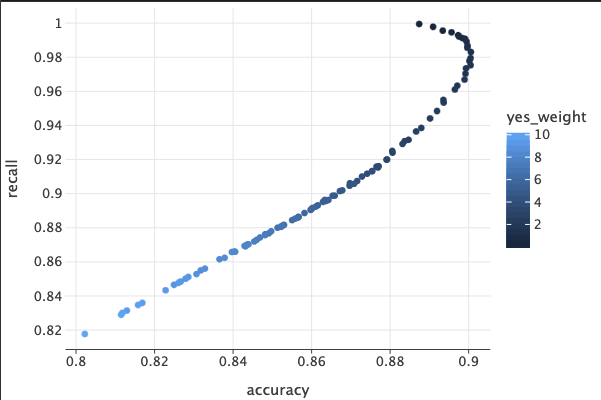

max-depth 8, t_size 0.35

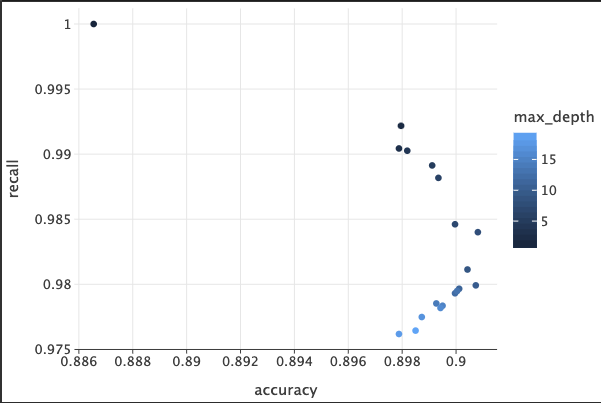

With t_size=0.35 and y_scale=1.2

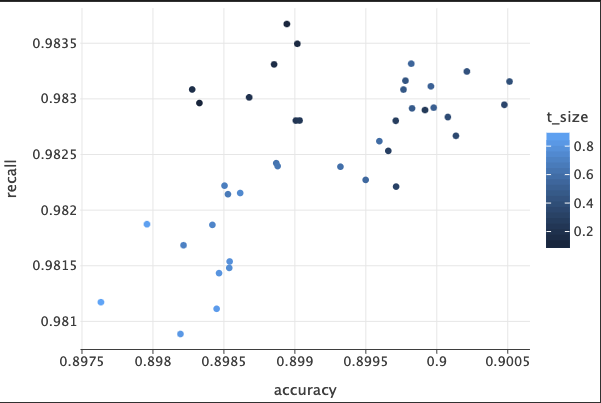

Depth 8, y scale 1.2

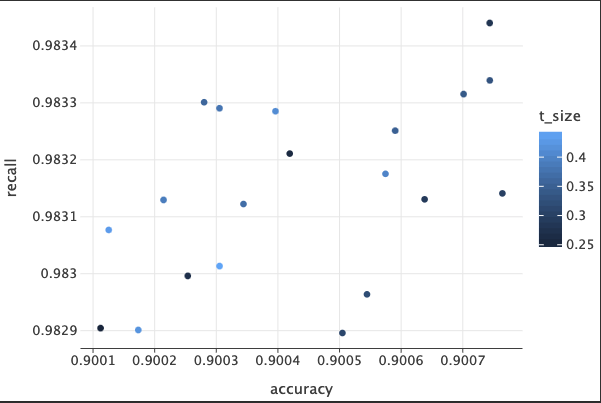

Depth 8, y scale 1.2

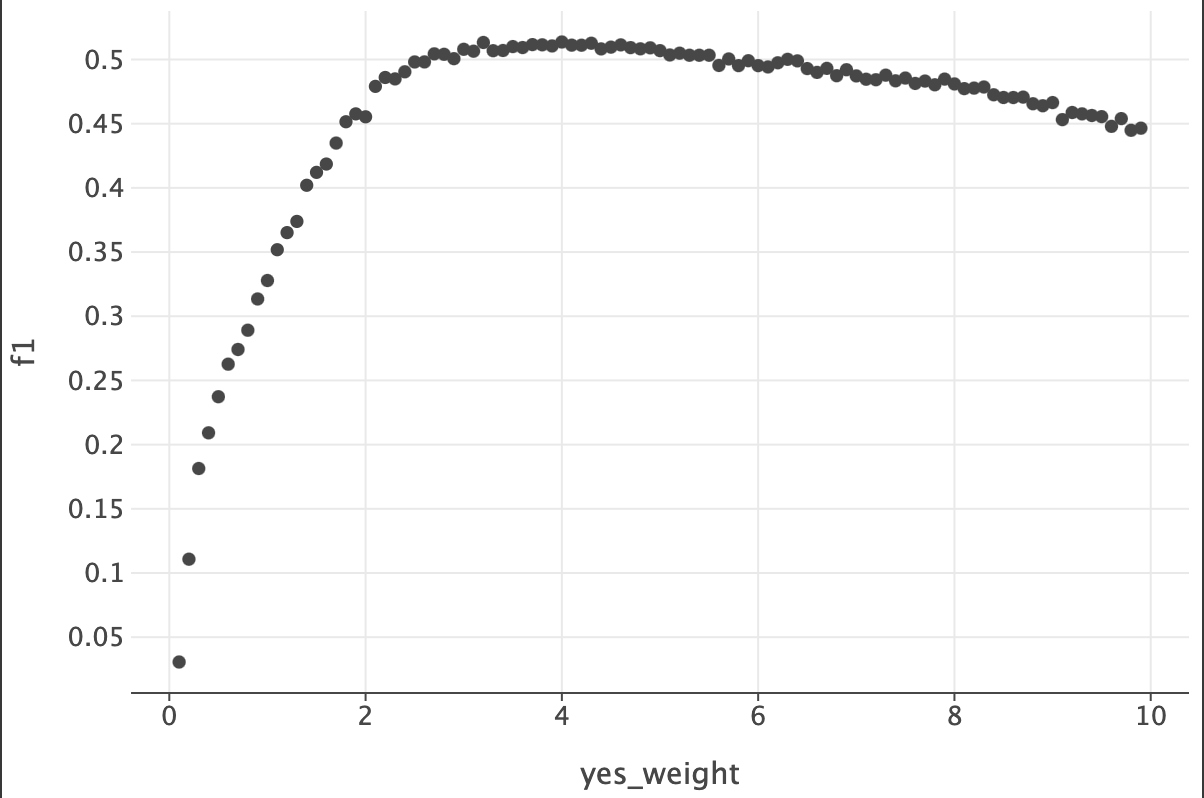

Depth 8, test size 0.35

# Mini Holdout

In [ ]:
mini_holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')
mini_y_df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini_answers.csv')

for col in numeric_cols:
  min, max = numeric_recast[col]
  mini_holdout[col] = mini_holdout[col].apply(lambda x: (x - min) / (max - min))

mini_y_df['y'] = mini_y_df['y'].apply(lambda x: 'yes' if x == 1 else 'no')

holdout_x = pd.get_dummies(mini_holdout[features], drop_first=True)
holdout_y = mini_y_df['y']

cmat = confusion_matrix(holdout_y, clf.predict(holdout_x))
precision = cmat[1,1] / (cmat[1,1] + cmat[1,0])
recall = cmat[1,1] / (cmat[1,1] + cmat[0,1])
f1 = 2 * precision * recall / (precision + recall)

print(f"Precision: {precision}")
print(f"Recall:    {recall}")
print(f"F1:        {f1}")

predictions = pd.DataFrame(clf.predict(holdout_x))
predictions[0] = predictions[0].apply(lambda x: 0 if x == 'no' else 1)

# predictions.to_csv('dallin_wolfer-predictions.csv', index=False)

predictions.value_counts()

Precision: 0.5531914893617021
Recall:    0.43333333333333335
F1:        0.48598130841121495


,count
0,
0,350
1,60


In [ ]:
holdout = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv"

mini_holdout = pd.read_csv(holdout)

for col in numeric_cols:
  min, max = numeric_recast[col]
  mini_holdout[col] = mini_holdout[col].apply(lambda x: (x - min) / (max - min))

holdout_x = pd.get_dummies(mini_holdout[features], drop_first=True)

predictions = pd.DataFrame(clf.predict(holdout_x))
predictions[0] = predictions[0].apply(lambda x: 0 if x == 'no' else 1)

predictions.to_csv('dallin_wolfer_holdout-predictions.csv', index=False)

predictions.value_counts()